EDA

In [41]:
#library imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [42]:
df_org = pd.read_csv('./power_tetouan_city_modified.csv')
print(df_org.info())
print(df_org.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53464 entries, 0 to 53463
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DateTime                   52977 non-null  object
 1   Temperature                52880 non-null  object
 2   Humidity                   52826 non-null  object
 3   Wind Speed                 52846 non-null  object
 4   general diffuse flows      52838 non-null  object
 5   diffuse flows              52849 non-null  object
 6   Zone 1 Power Consumption   52861 non-null  object
 7   Zone 2  Power Consumption  52839 non-null  object
 8   Zone 3  Power Consumption  52889 non-null  object
 9   mixed_type_col             48162 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB
None
        DateTime Temperature Humidity Wind Speed general diffuse flows  \
0  1/1/2017 0:00       6.559     73.8      0.083                 0.051   
1  1/1/2017 0:10       6.414     74.5

In [43]:
# Al ver que la columna de "mixed_type_col" no aporta nada, la eliminamos
df_org = df_org.drop(columns=['mixed_type_col'])

In [44]:
print(df_org.describe())
print('--------------------')
print('NULL VALLUES:')
print(df_org.isnull().sum())

       DateTime Temperature Humidity Wind Speed general diffuse flows  \
count     52977       52880    52826      52846                 52838   
unique    52036        5446     6291       1187                 11915   
top        NAN            ?     84.6      0.082                 0.055   
freq         21          57      182       2179                  1488   

       diffuse flows Zone 1 Power Consumption Zone 2  Power Consumption  \
count          52849                    52861                     52839   
unique         11923                    29720                     31474   
top            0.115                        ?                     error   
freq            1196                       57                        50   

       Zone 3  Power Consumption  
count                      52889  
unique                     25057  
top                        error  
freq                          50  
--------------------
NULL VALLUES:
DateTime                     487
Temperature    

In [45]:
#LIMPIEZA DE VALORES NULOS Y CON ERRORES

#Eliminamos registros con valores nulos
df_org = df_org.dropna()

df_org = df_org.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#Eliminamos registros cuyo valor sea ?
df_org = df_org[~df_org.isin(['?']).any(axis=1)]

#Eliminamos registros cuyo valor sea error
df_org = df_org[~df_org.isin(['error']).any(axis=1)]

#Eliminamos registros cuyo valor sea NAN
df_org = df_org[~df_org.isin(['NAN']).any(axis=1)]

#Eliminamos registros cuyo valor sea invalid
df_org = df_org[~df_org.isin(['invalid']).any(axis=1)]

#Eliminamos registros cuyo valor sea invalid
df_org = df_org[~df_org.isin(['null']).any(axis=1)]

#Eliminamos espacios extra
df_org['DateTime'] = df_org['DateTime'].str.strip()

In [46]:
# Lista de columnas que deberían ser numéricas
cols_numericas = ['Temperature', 'Humidity', 'Wind Speed',
                  'general diffuse flows', 'diffuse flows',
                  'Zone 1 Power Consumption', 'Zone 2  Power Consumption',
                  'Zone 3  Power Consumption']

# Intentar convertir cada una a numérico
for col in cols_numericas:
    df_org[col] = pd.to_numeric(df_org[col], errors='coerce')
    #df_org[col] = df_org[col].apply(lambda x: '{:.4f}'.format(x) if pd.notnull(x) else '')

In [47]:
print(df_org.describe())
print('--------------------')
print('NULL VALLUES:')
print(df_org.isnull().sum())

        Temperature      Humidity    Wind Speed  general diffuse flows  \
count  46975.000000  46979.000000  46978.000000           46978.000000   
mean      27.752564     90.188067      5.640205             227.472972   
std      169.499677    299.043696     80.477812            1250.755567   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.470000     58.420000      0.078000               0.066000   
50%       18.900000     70.100000      0.086000               6.322500   
75%       23.050000     81.700000      4.915000             328.650000   
max    28149.240000   8460.000000  14337.903000           69797.000000   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count   46976.000000              4.697800e+04               4.697700e+04   
mean       99.520228              4.169137e+04               2.645133e+04   
std       570.815750              1.459937e+05               8.962806e+04   
min         0.011000     

In [48]:
#Guardamos un nuevo archivo con datos limpios
df_org.to_csv('./power_tetouan_city_clean.csv')

In [49]:
df_org = pd.read_csv('./power_tetouan_city_clean.csv')

In [50]:
#let set datetime to datetime type and as index:
df_org['DateTime'] = pd.to_datetime(df_org['DateTime'])
#df_org['Temperature'] = pd.to_numeric(df_org['Temperature'])


df_org = df_org.set_index('DateTime')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 46984 entries, 2017-01-01 00:10:00 to 2017-07-08 05:20:00
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 46984 non-null  int64  
 1   Temperature                46975 non-null  float64
 2   Humidity                   46979 non-null  float64
 3   Wind Speed                 46978 non-null  float64
 4   general diffuse flows      46978 non-null  float64
 5   diffuse flows              46976 non-null  float64
 6   Zone 1 Power Consumption   46978 non-null  float64
 7   Zone 2  Power Consumption  46977 non-null  float64
 8   Zone 3  Power Consumption  46975 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.6 MB


In [51]:
df_org.head(5)

,Unnamed: 0,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,,
2017-01-01 00:10:00,1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
2017-01-01 00:50:00,5,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048


In [52]:
print(df_org.describe())
print(df_org.isnull().sum())

         Unnamed: 0   Temperature      Humidity    Wind Speed  \
count  46984.000000  46975.000000  46979.000000  46978.000000   
mean   26765.733186     27.752564     90.188067      5.640205   
std    15428.603117    169.499677    299.043696     80.477812   
min        1.000000      3.247000     11.340000      0.050000   
25%    13414.750000     14.470000     58.420000      0.078000   
50%    26777.500000     18.900000     70.100000      0.086000   
75%    40124.250000     23.050000     81.700000      4.915000   
max    53463.000000  28149.240000   8460.000000  14337.903000   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
count           46978.000000   46976.000000              4.697800e+04   
mean              227.472972      99.520228              4.169137e+04   
std              1250.755567     570.815750              1.459937e+05   
min                 0.004000       0.011000              1.389570e+04   
25%                 0.066000       0.122000      

There seems to be no nulls, or weird outliers, now lets visualize the consumpiton, before lets clean the column names

In [53]:
print(df_org.columns)

Index(['Unnamed: 0', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')


In [54]:
df = df_org.copy()

In [55]:
#cleaning column names
df.rename(columns={
    'Temperature': 'temp',
    'Humidity':'hum',
    'Wind Speed':'wind',
    'general diffuse flows':'gen_diffuse_flows',
    'diffuse flows':'diffuse_flows',
    'Zone 1 Power Consumption':'z1_power_cons',
    'Zone 2  Power Consumption':'z2_power_cons',
    'Zone 3  Power Consumption':'z3_power_cons',
}, inplace=True)

In [56]:
print(df.columns)

Index(['Unnamed: 0', 'temp', 'hum', 'wind', 'gen_diffuse_flows',
       'diffuse_flows', 'z1_power_cons', 'z2_power_cons', 'z3_power_cons'],
      dtype='object')


In [57]:
df = df[~df.index.duplicated(keep='first')]

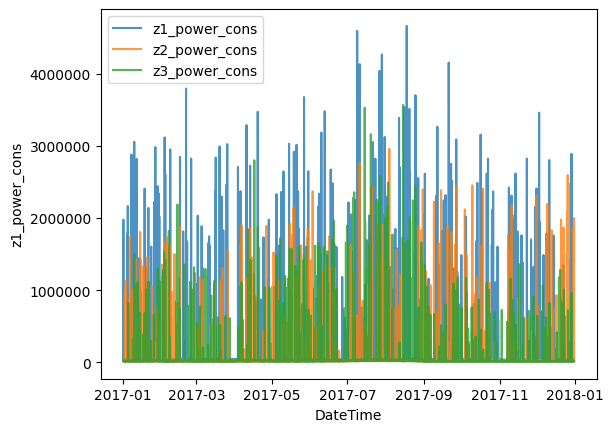

In [58]:
plt.gca().ticklabel_format(style='plain', axis='y')
for zone in ['z1_power_cons','z2_power_cons','z3_power_cons']:
    sns.lineplot(x=df.index,
                y=zone,
                data=df,
                label=zone, 
                alpha=0.8)
plt.legend()

We can see a spike for all zones around month 8, which is summer, so should be because of higher temperatures. Lets look at the behaviour of consumption per zone

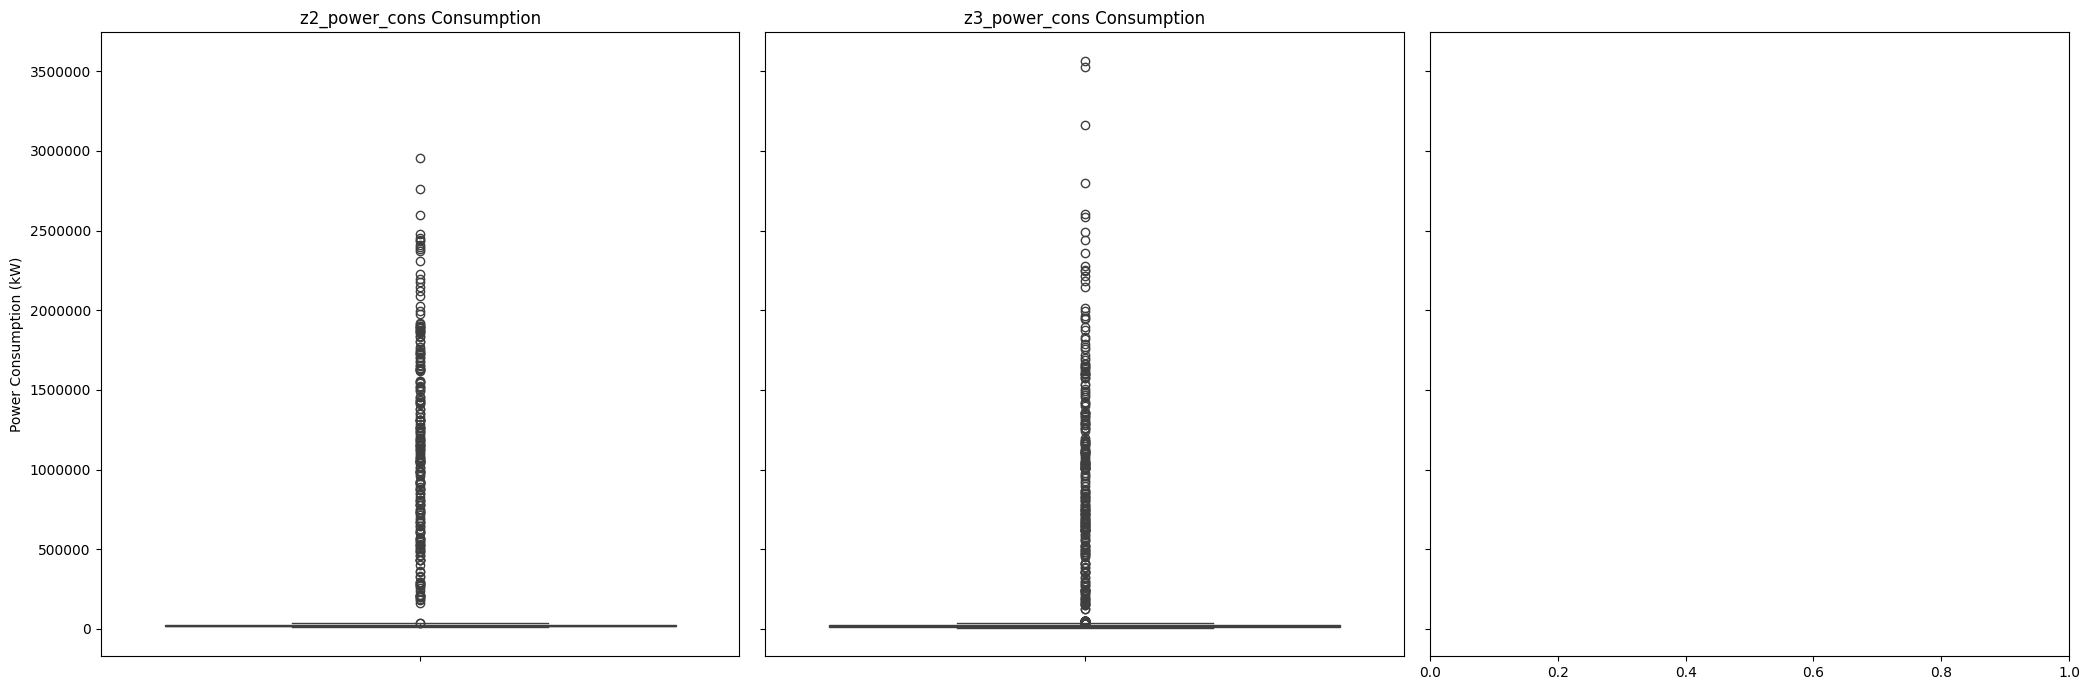

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z2_power_cons','z3_power_cons']):
    sns.boxplot( y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption')
    axes[i].set_ylabel('Power Consumption (kW)')

    # Desactivar notación científica en el eje y
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

We can see an stable behaviour in the boxplots, and only in zone 3 we have some outliers that could be explain from the previous graph on the peak around august. And in general we can see again how zone 1 consumes more, then zone 2 and at last is zone 3 with its outliers, now lets visualize its distributions

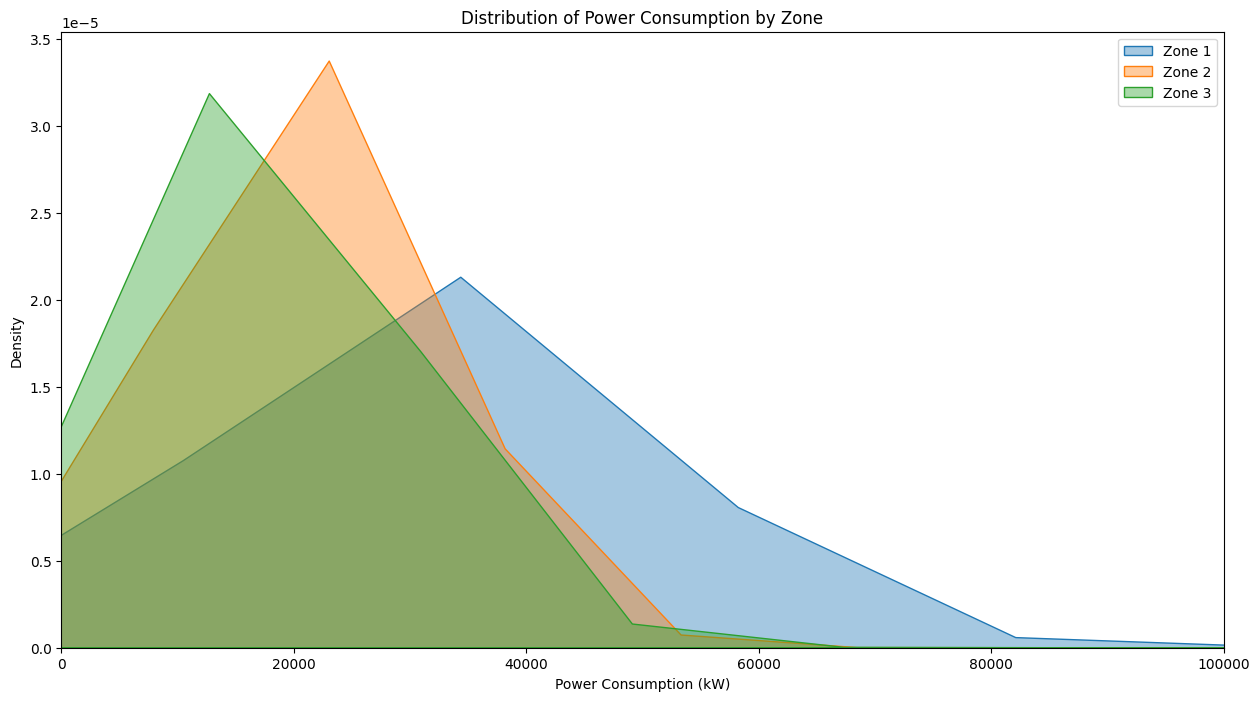

In [60]:
plt.figure(figsize=(15,8))
plt.gca().ticklabel_format(style='plain', axis='x')
sns.kdeplot(df['z1_power_cons'], label='Zone 1', fill=True, alpha=0.4)
sns.kdeplot(df['z2_power_cons'], label='Zone 2', fill=True, alpha=0.4)
sns.kdeplot(df['z3_power_cons'], label='Zone 3', fill=True, alpha=0.4)
plt.xlim(0, 100000)  # Aquí defines el límite inferior y superior del eje x

plt.title("Distribution of Power Consumption by Zone")
plt.xlabel("Power Consumption (kW)")
plt.ylabel("Density")
plt.legend()
plt.show()

We can see that zone 3 and 2 have very similar distributions slightly skewed to the left, while zone 1 distribution seems to be a bit more centered, now lets see at the correlations with the features

<Axes: >

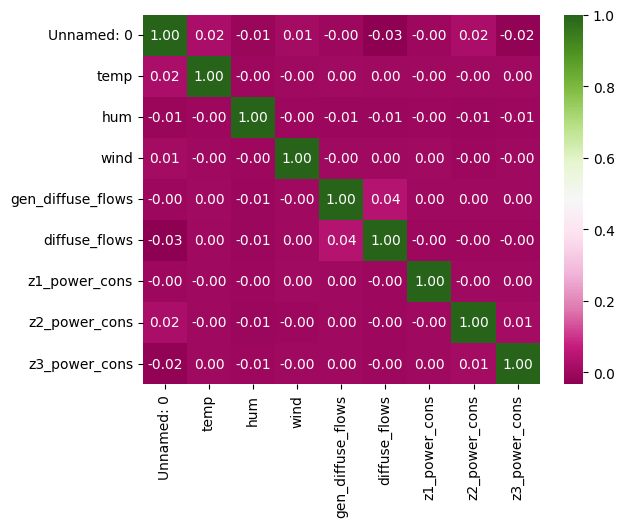

In [61]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG", cbar=True)

Now lets ee correlation specific per zone

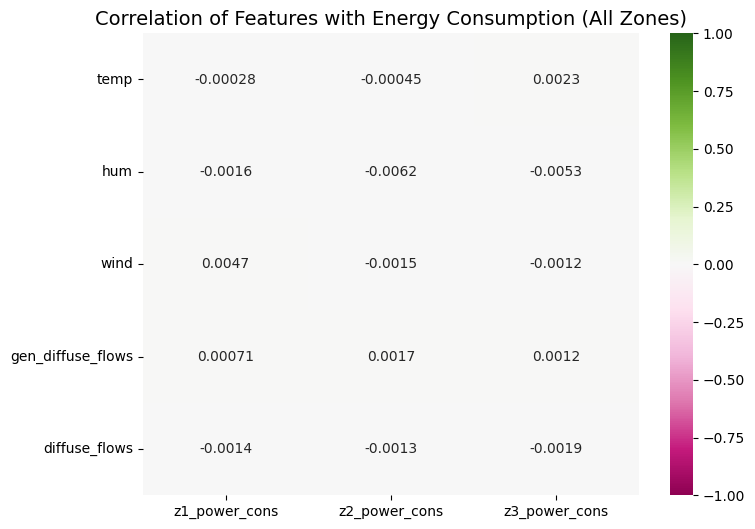

In [62]:
# Filter per zone

corr = df.corr()

features = ['temp', 'hum', 'wind', 'gen_diffuse_flows', 'diffuse_flows']
zone_corr = corr.loc[features, ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']]

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(zone_corr, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title("Correlation of Features with Energy Consumption (All Zones)", fontsize=14)
plt.show()


We can see how there is a good correlation with the temp across all zones, and some correlation with wind and diffuse flows, and we can aslo see an inverse correlation with humidity which makes sense.  
Lets visualize this in scatter plots

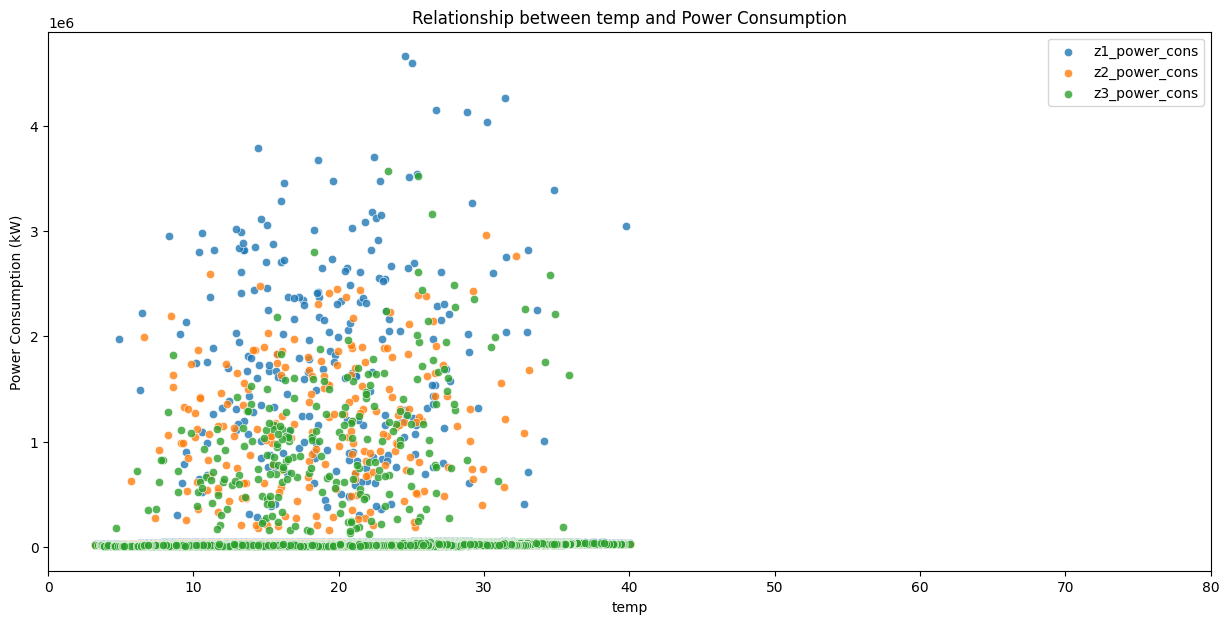

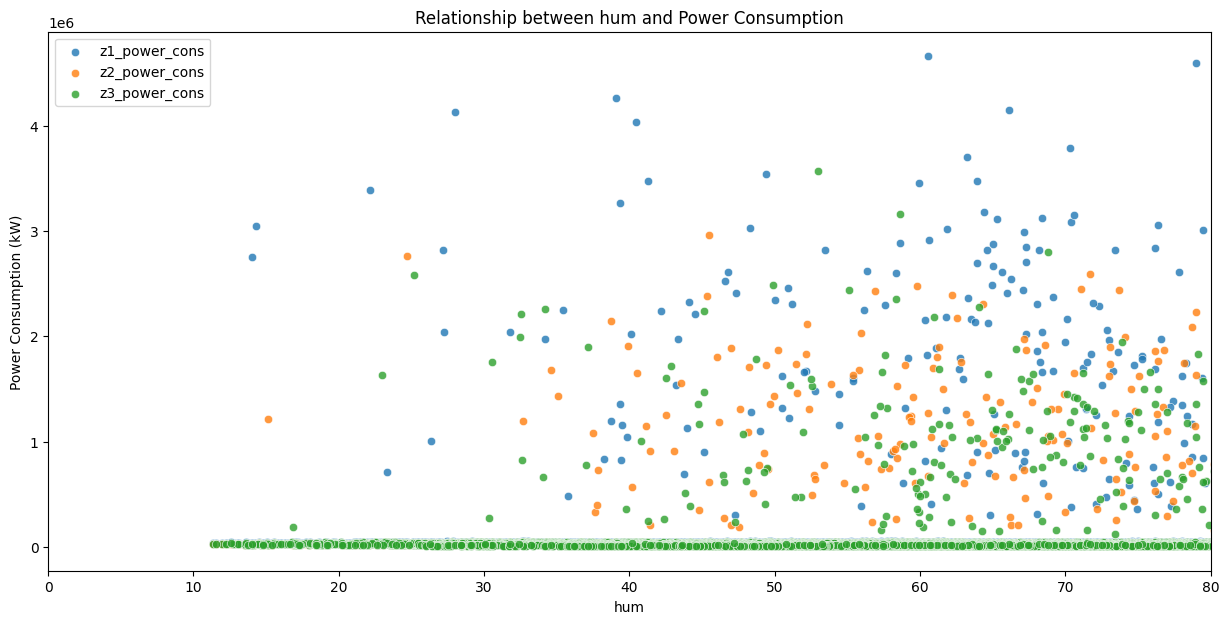

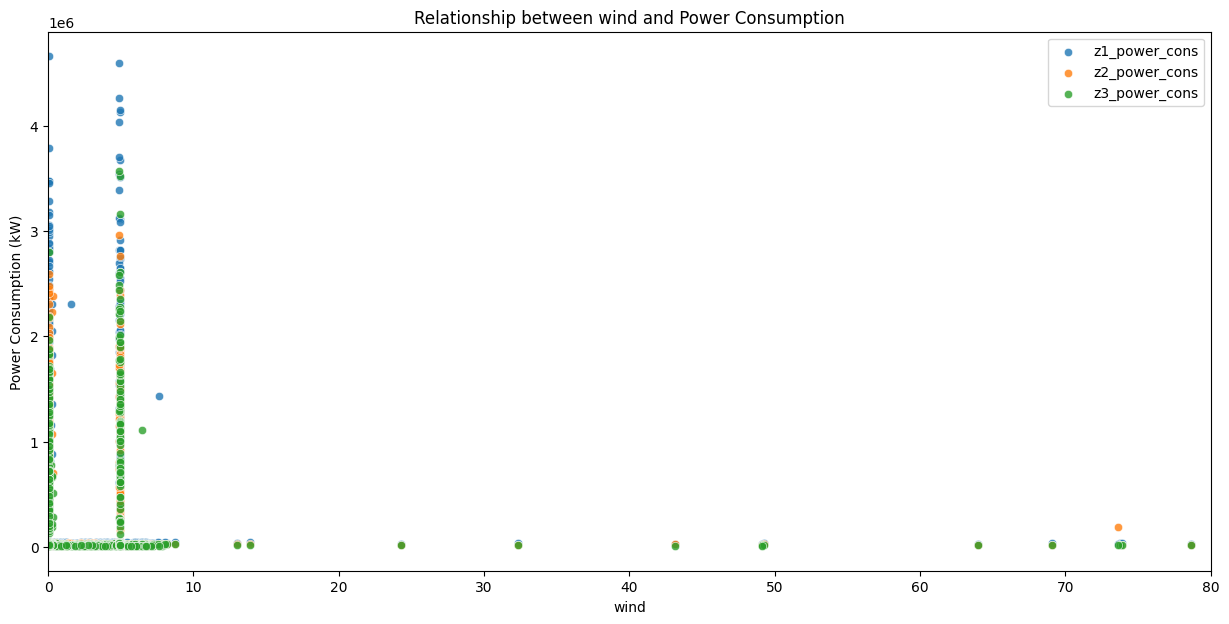

In [63]:
for weather_feature in ['temp','hum','wind']:

    plt.figure(figsize=(15,7))

    for zone in ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']:

        sns.scatterplot(x=weather_feature, y=zone, data=df, label=zone, alpha=0.8)

    plt.title(f"Relationship between {weather_feature} and Power Consumption")
    plt.xlabel(weather_feature)
    plt.ylabel("Power Consumption (kW)")
    plt.legend()
    plt.xlim(0, 80)
    plt.show()

By looking at the scatter plots, the relationship doesn´t seem clear, only for temperature seem to be some positive correlation, lets try to get more clarity by using the mean values

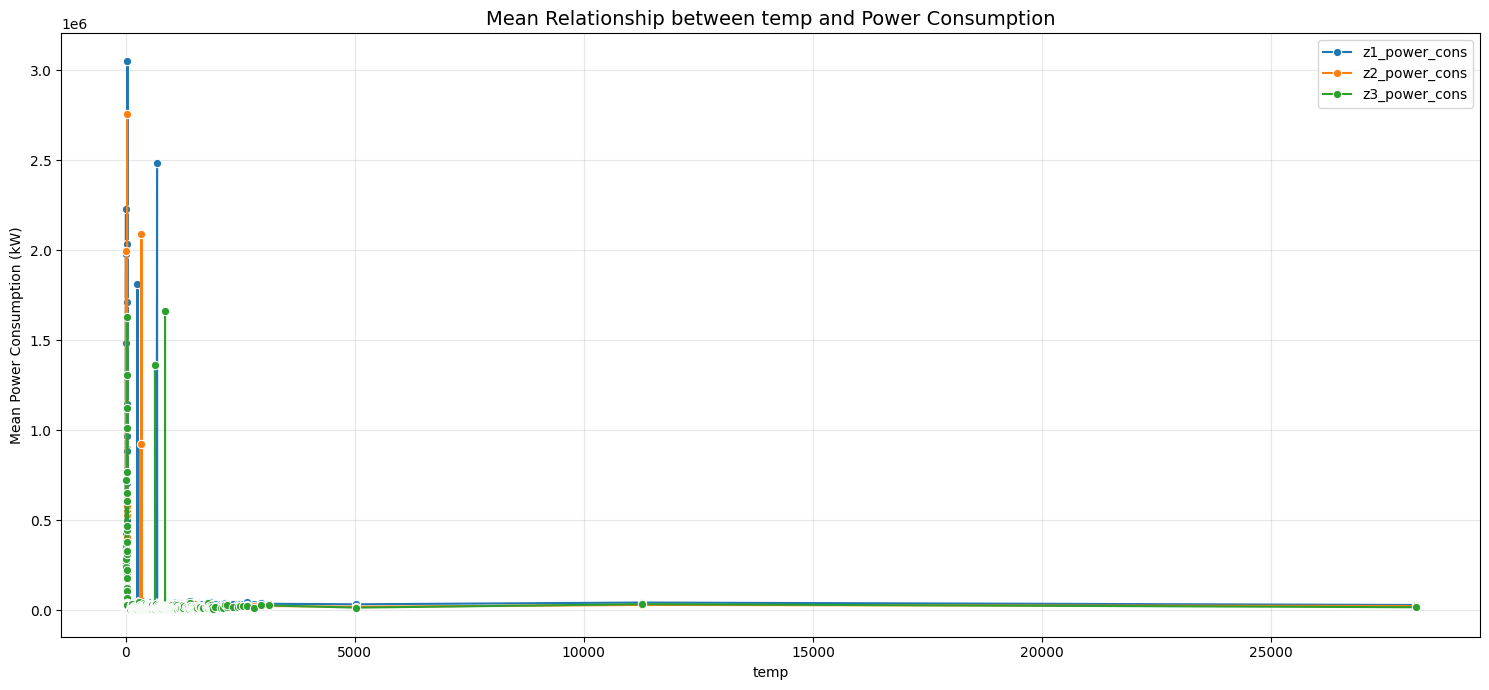

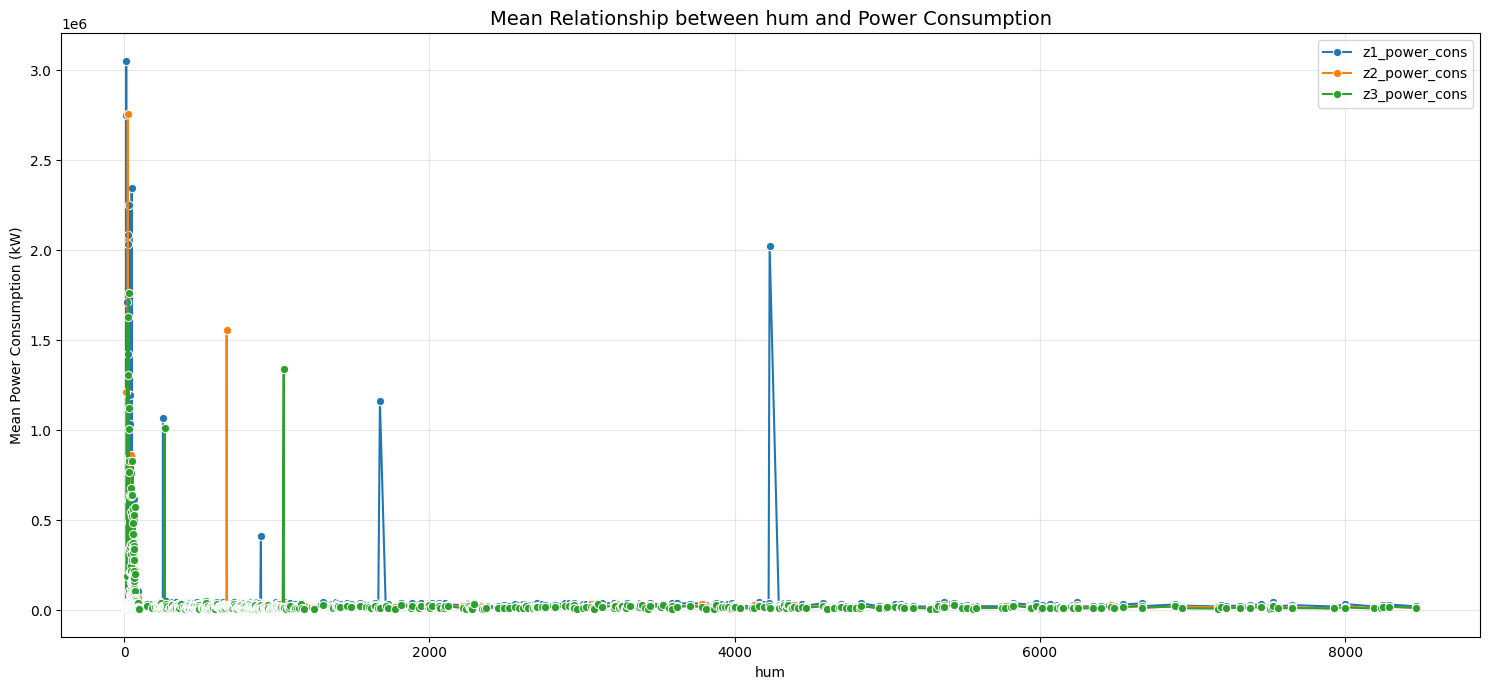

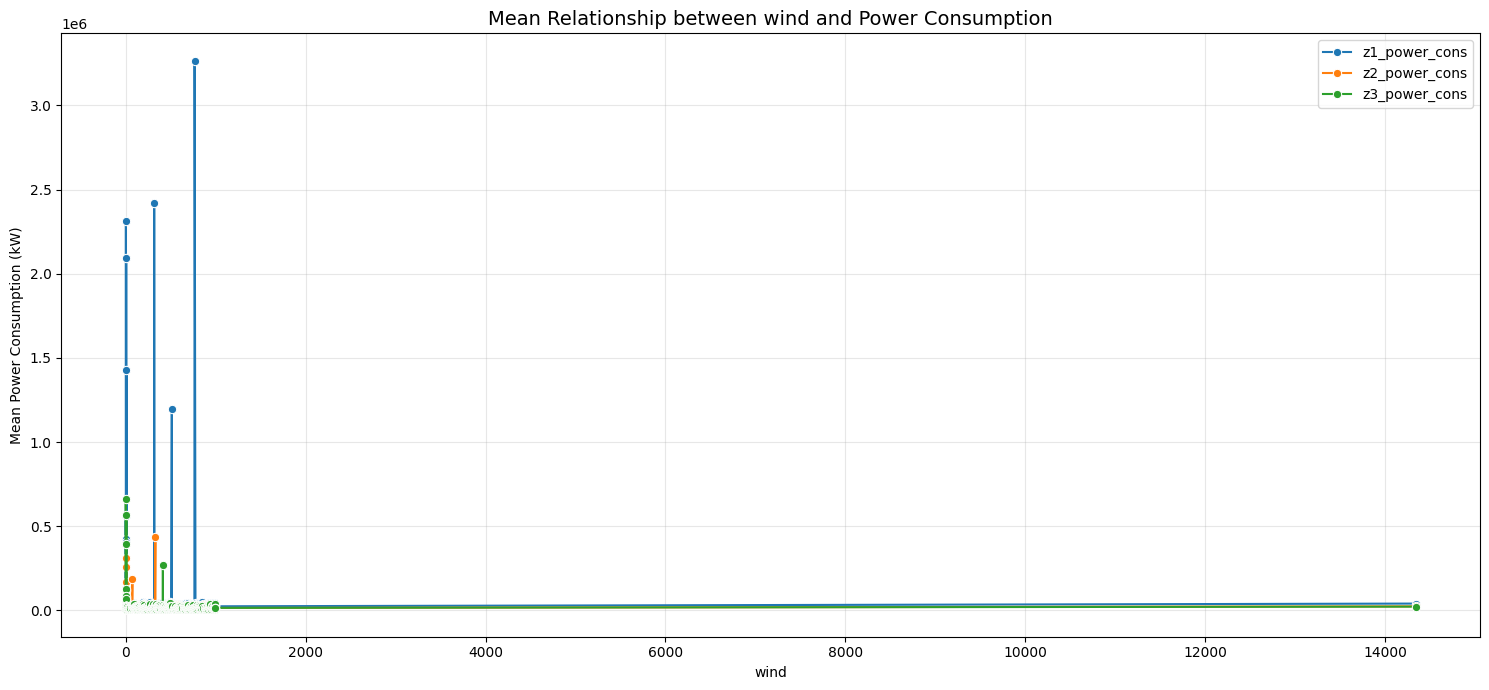

In [64]:
for weather_feature in ['temp', 'hum', 'wind']:

    mean_df = df.groupby(weather_feature)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()

    plt.figure(figsize=(15,7))

    for zone in ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']:
        sns.lineplot(x=weather_feature, y=zone, data=mean_df, label=zone, marker='o')

    plt.title(f"Mean Relationship between {weather_feature} and Power Consumption", fontsize=14)
    plt.xlabel(weather_feature)
    plt.ylabel("Mean Power Consumption (kW)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

We can see more clearly the relationshi with temp, but still looks a bit messy, we will bin the data to look more clean.

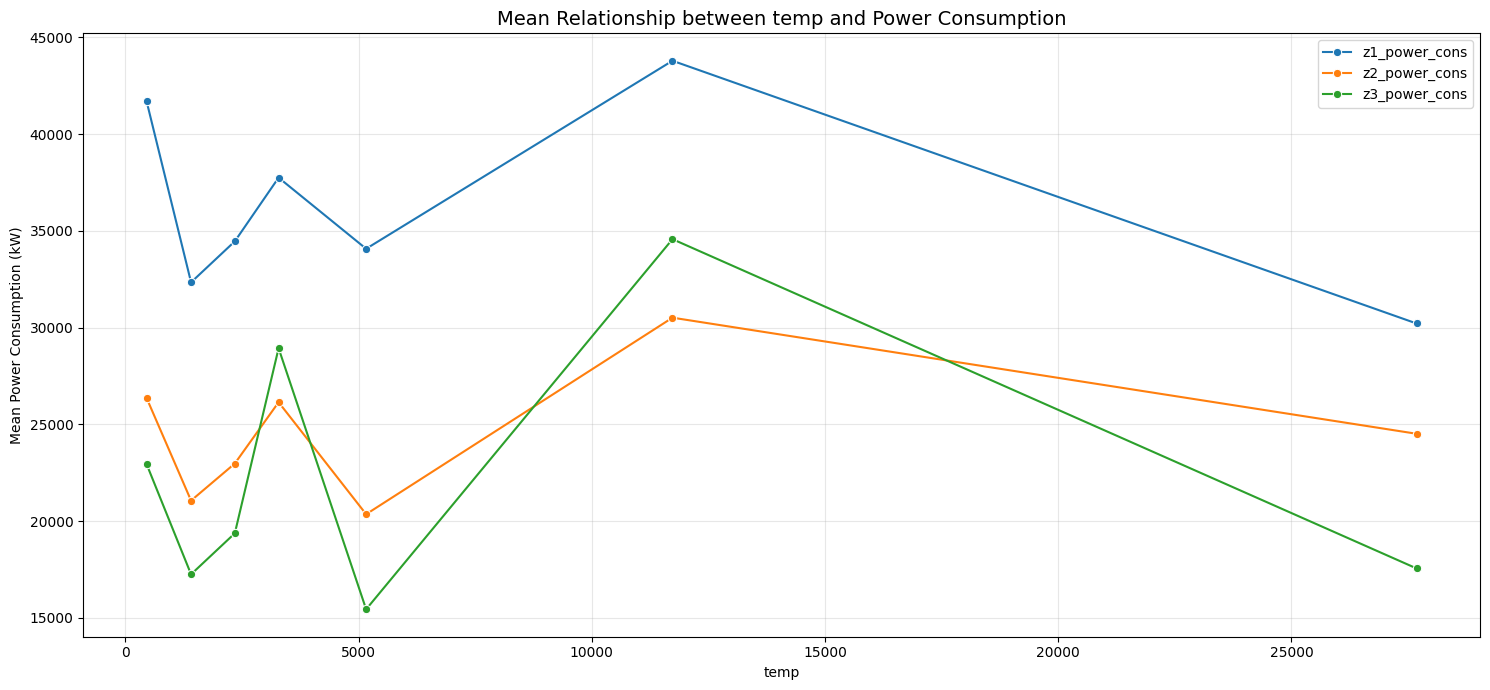

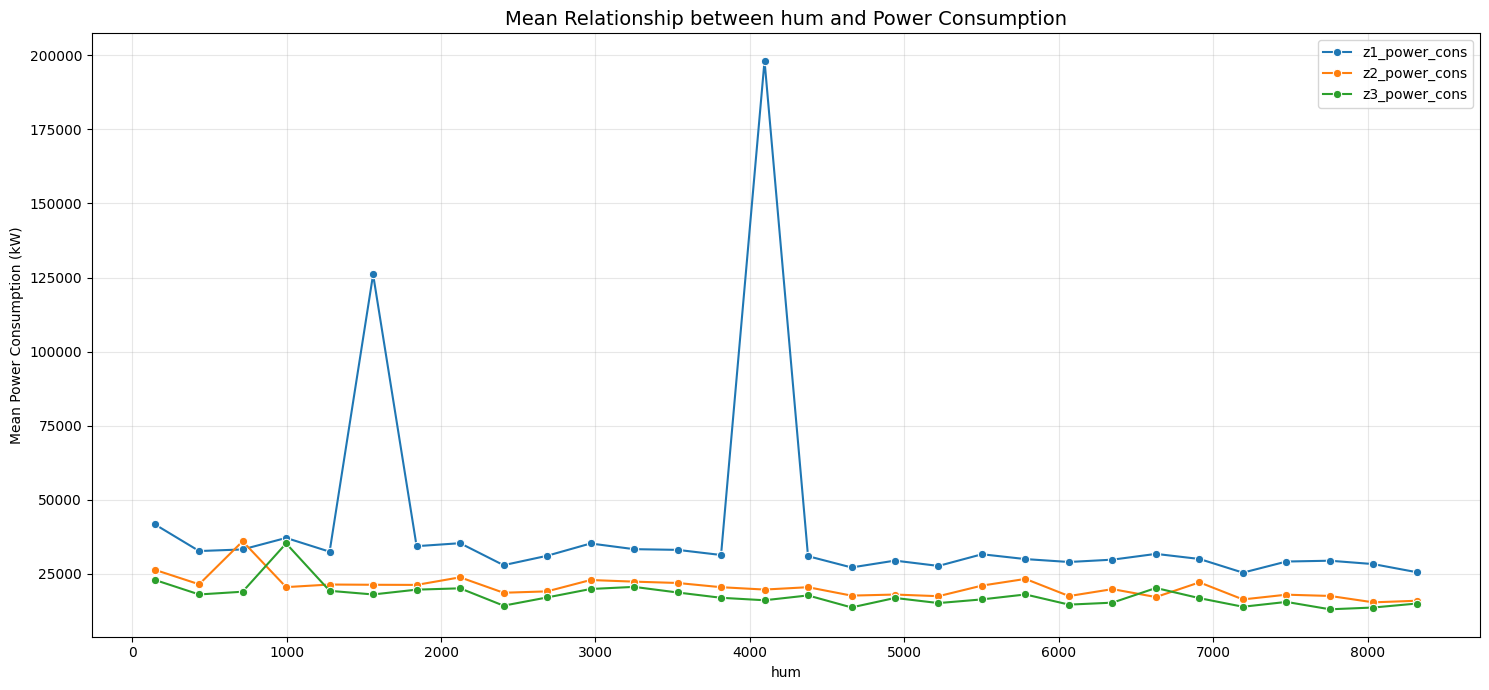

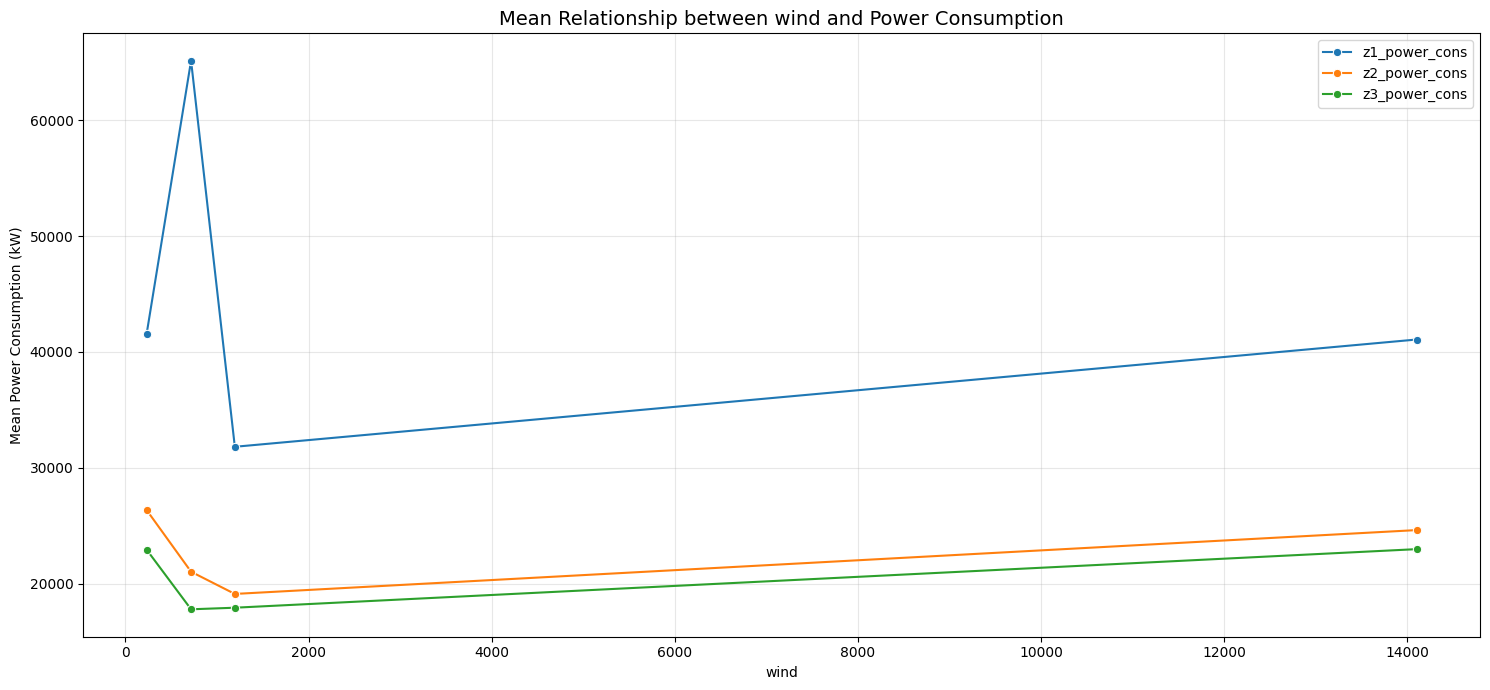

In [65]:
for weather_feature in ['temp', 'hum', 'wind']:

    bin = weather_feature + '_bin'

    df[bin] = pd.cut(df[weather_feature], bins=30)
    mean_df = df.groupby(bin)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean().reset_index()
    mean_df[bin] = mean_df[bin].apply(lambda x: x.mid)

    plt.figure(figsize=(15,7))

    for zone in ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']:
        sns.lineplot(x=bin, y=zone, data=mean_df, label=zone, marker='o')

    plt.title(f"Mean Relationship between {weather_feature} and Power Consumption", fontsize=14)
    plt.xlabel(weather_feature)
    plt.ylabel("Mean Power Consumption (kW)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

We can now see more clearly how more temp meand more consumption generally, and now we can see a slight inverse relationship with humidity, and no really a clear relationship with Wind, expect that when the wind is high the consumption tends to go down.

Now we will alanyze time variables to look for seasonal effects

In [66]:
df.drop(columns=(['temp_bin','wind_bin','hum_bin']), inplace=True)
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
df['month'] = df.index.month
df['day'] = df.index.day

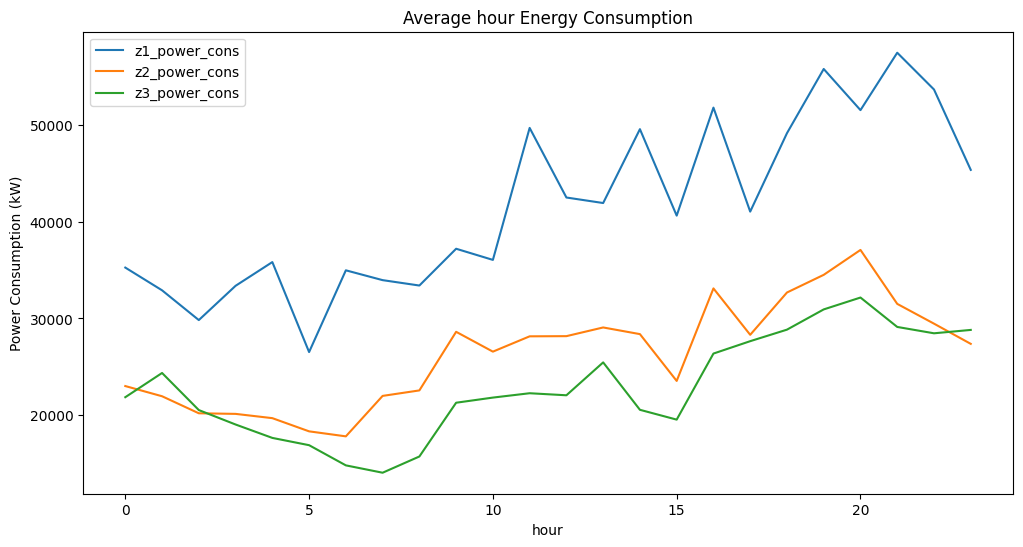

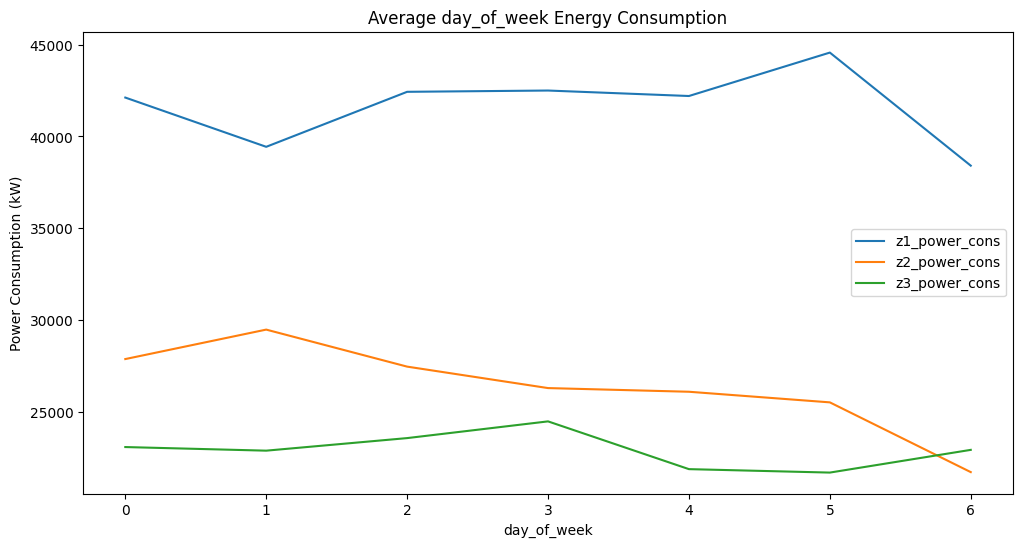

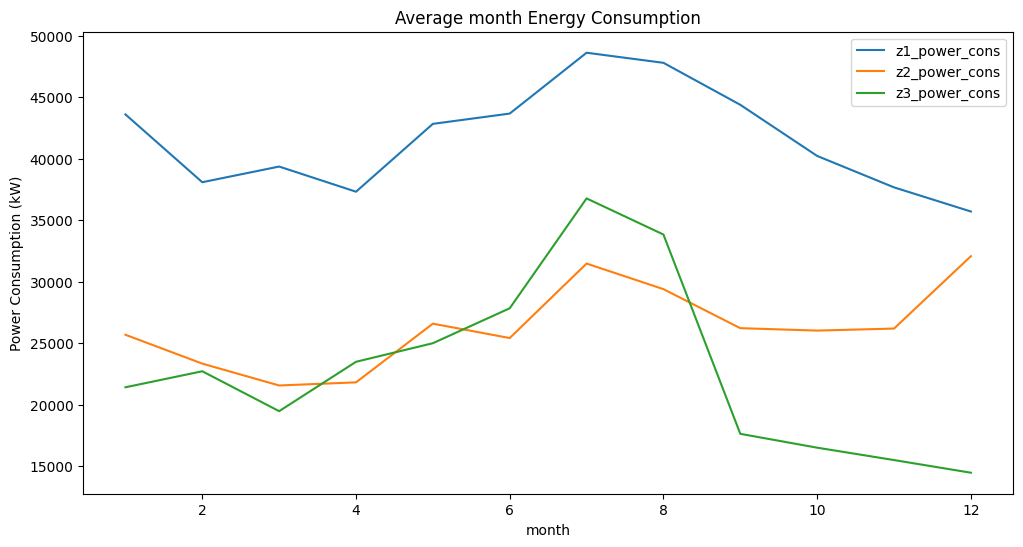

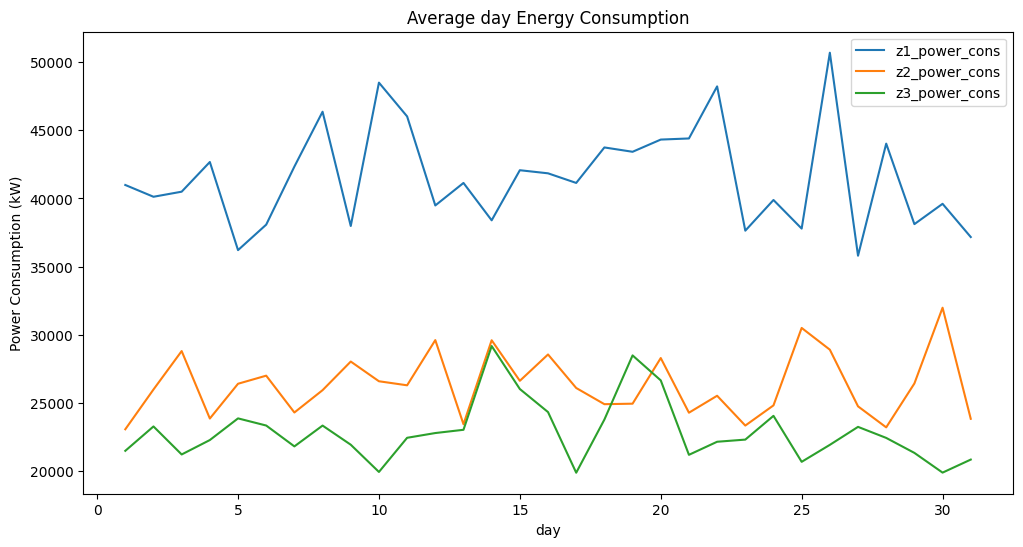

In [67]:
for time_lvl in ['hour','day_of_week','month','day']:

    grouped = df.groupby(time_lvl)[['z1_power_cons', 'z2_power_cons', 'z3_power_cons']].mean()

    grouped.plot(figsize=(12,6))
    plt.title(f"Average {time_lvl} Energy Consumption")
    plt.ylabel("Power Consumption (kW)")
    plt.xlabel(time_lvl)
    plt.show()

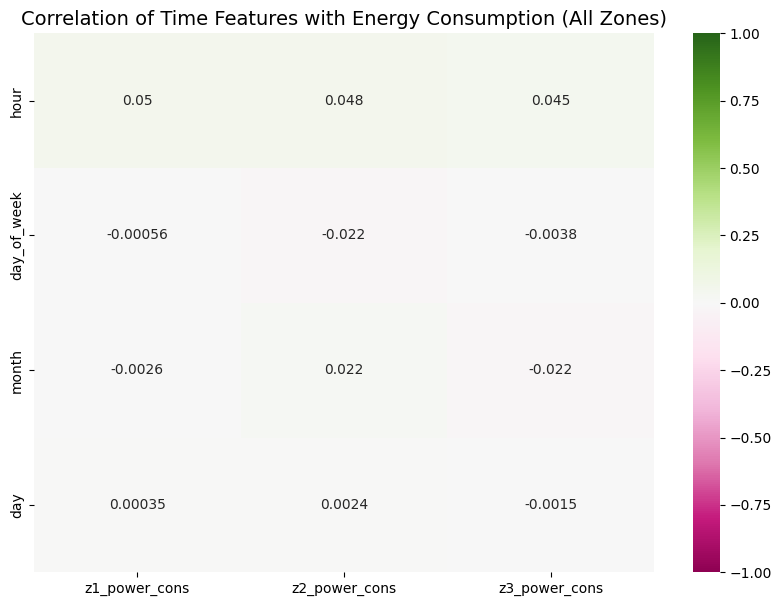

In [68]:
# Filter per zone

corr = df.corr()

features = ['hour','day_of_week','month','day']
zone_corr = corr.loc[features, ['z1_power_cons', 'z2_power_cons', 'z3_power_cons']]

# Plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(zone_corr, annot=True, cmap='PiYG', vmin=-1, vmax=1)
plt.title("Correlation of Time Features with Energy Consumption (All Zones)", fontsize=14)
plt.show()

We can see a good correlation with hour and month, only zone 1 has no strong correlation with month, also zone two has some good correlation with day of week. The only time feature that seems to not add much is day, so we will drop it.

But now let see if hour feature is related because of temperature

<Axes: >

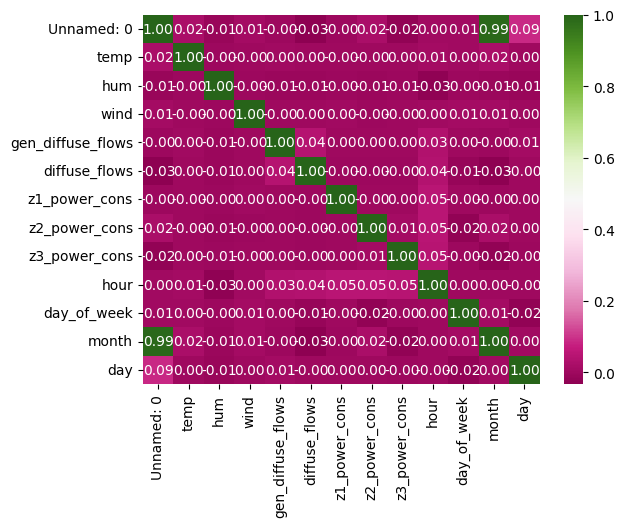

In [69]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="PiYG", cbar=True)

They don´t seem to have a big correlation, but this is linear, lets visualize a plot

<Axes: xlabel='hour', ylabel='temp'>

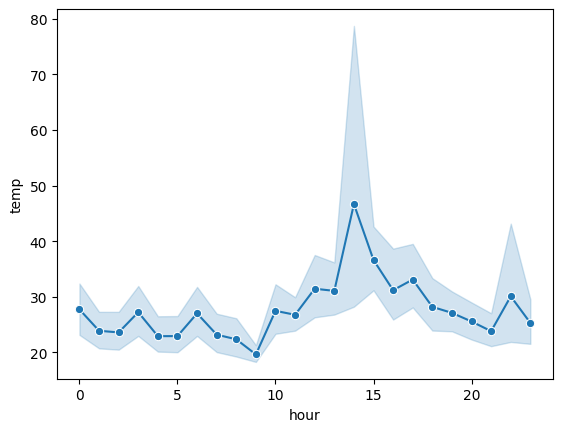

In [70]:
sns.lineplot(x='hour', y='temp', data=df, marker='o')

They seem to behave pretty similar, but still hour can help for the forecast since we want a very granular forecast, lets visualize these time variables behaviours

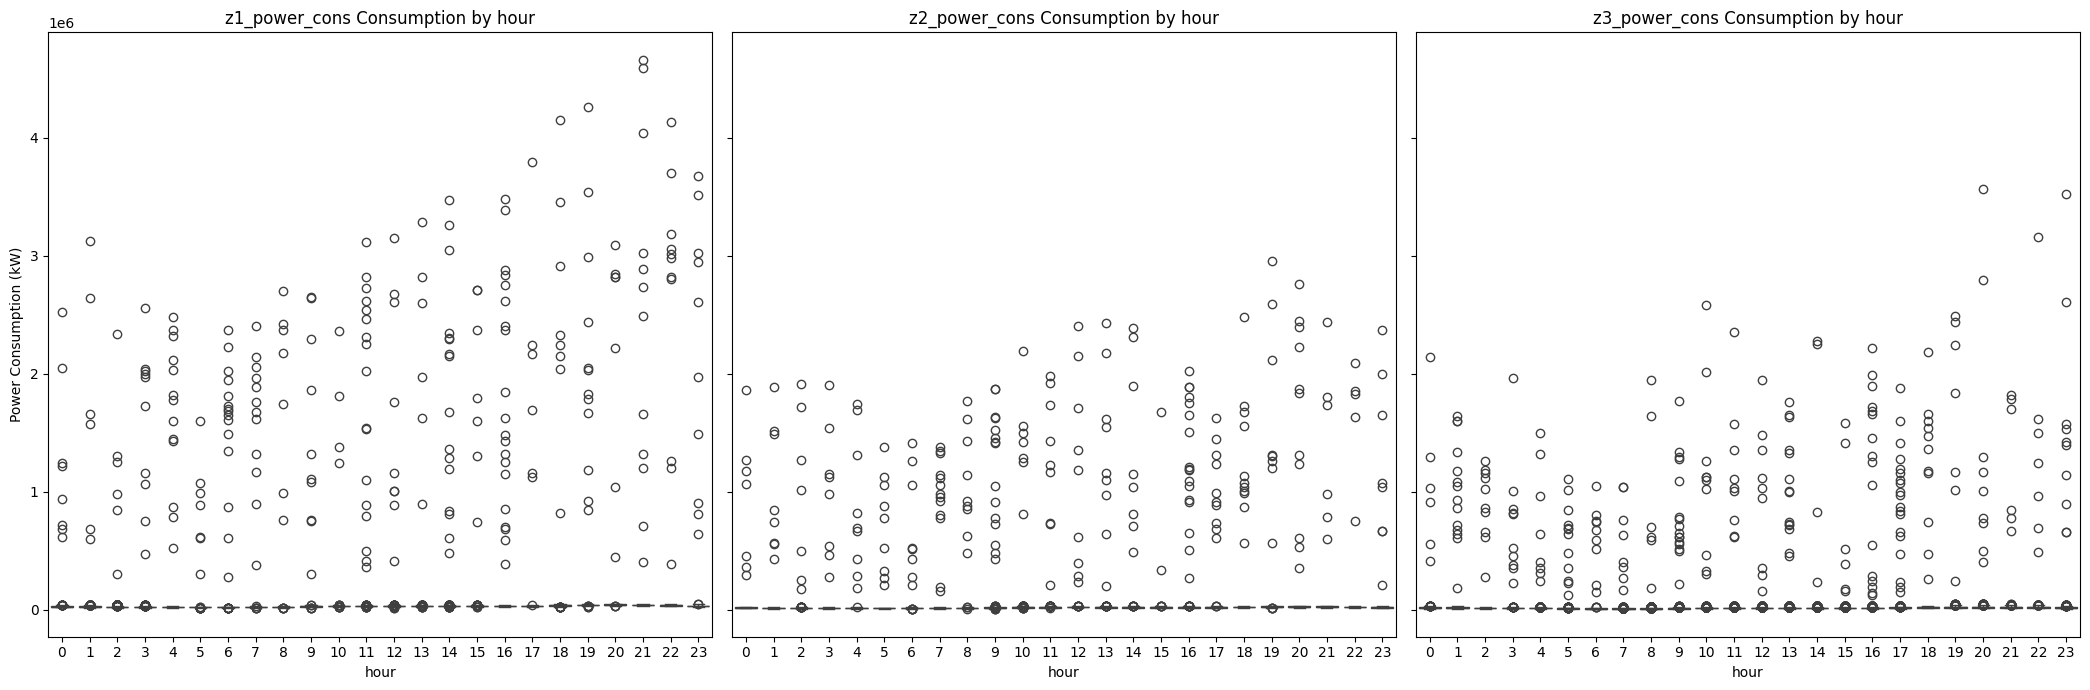

In [71]:
feature = 'hour'

fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot(x='hour', y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption by {feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

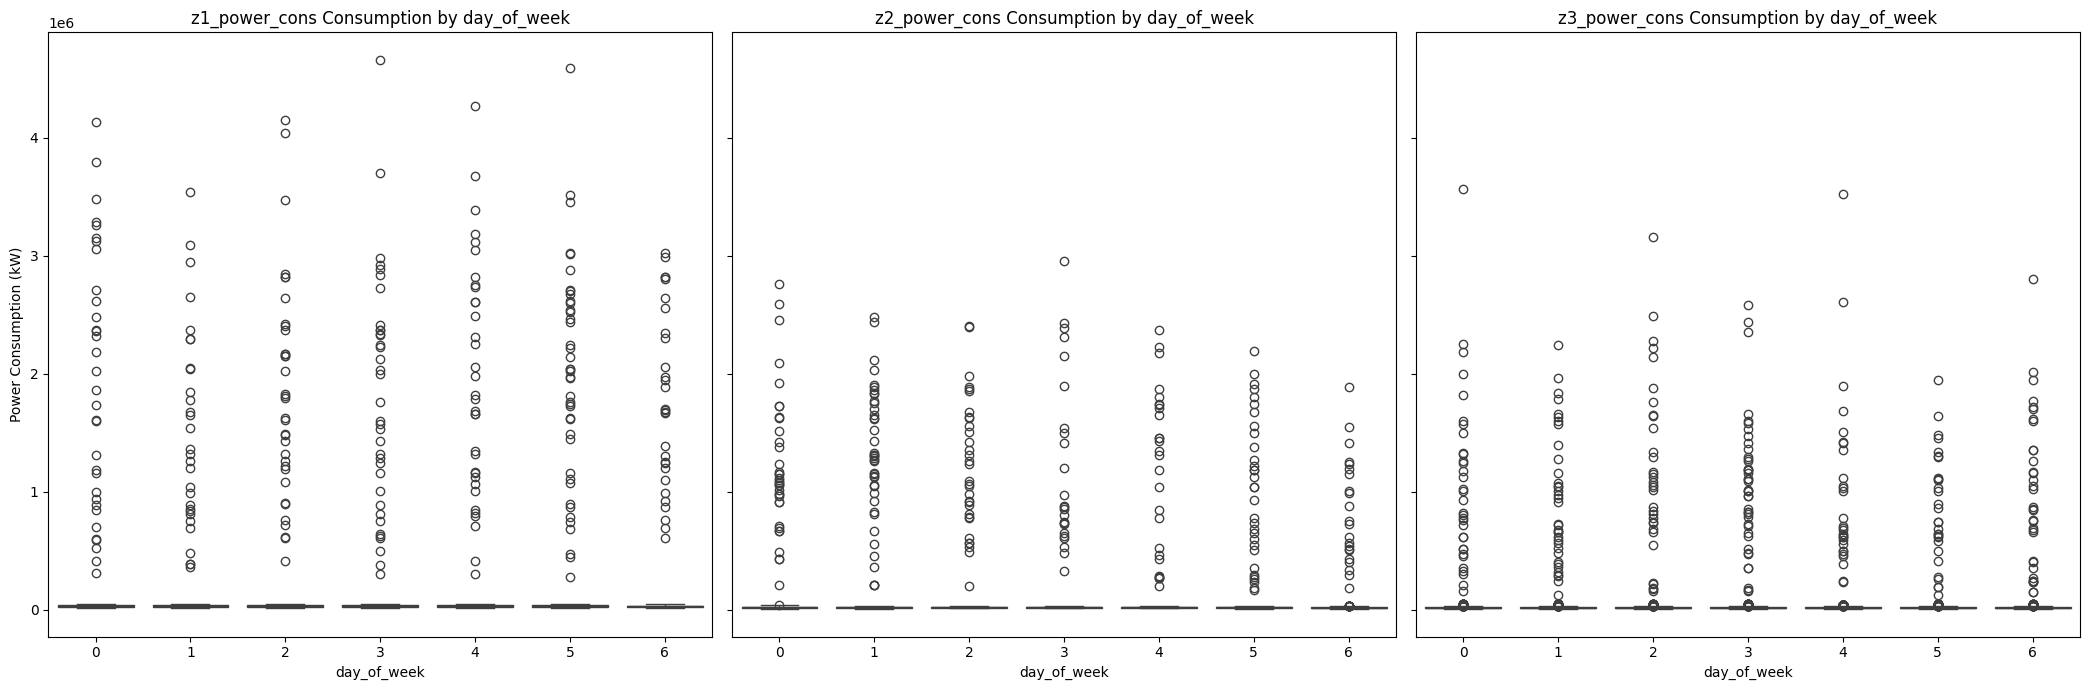

In [72]:
feature = 'day_of_week'

fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot(x=feature, y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption by {feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

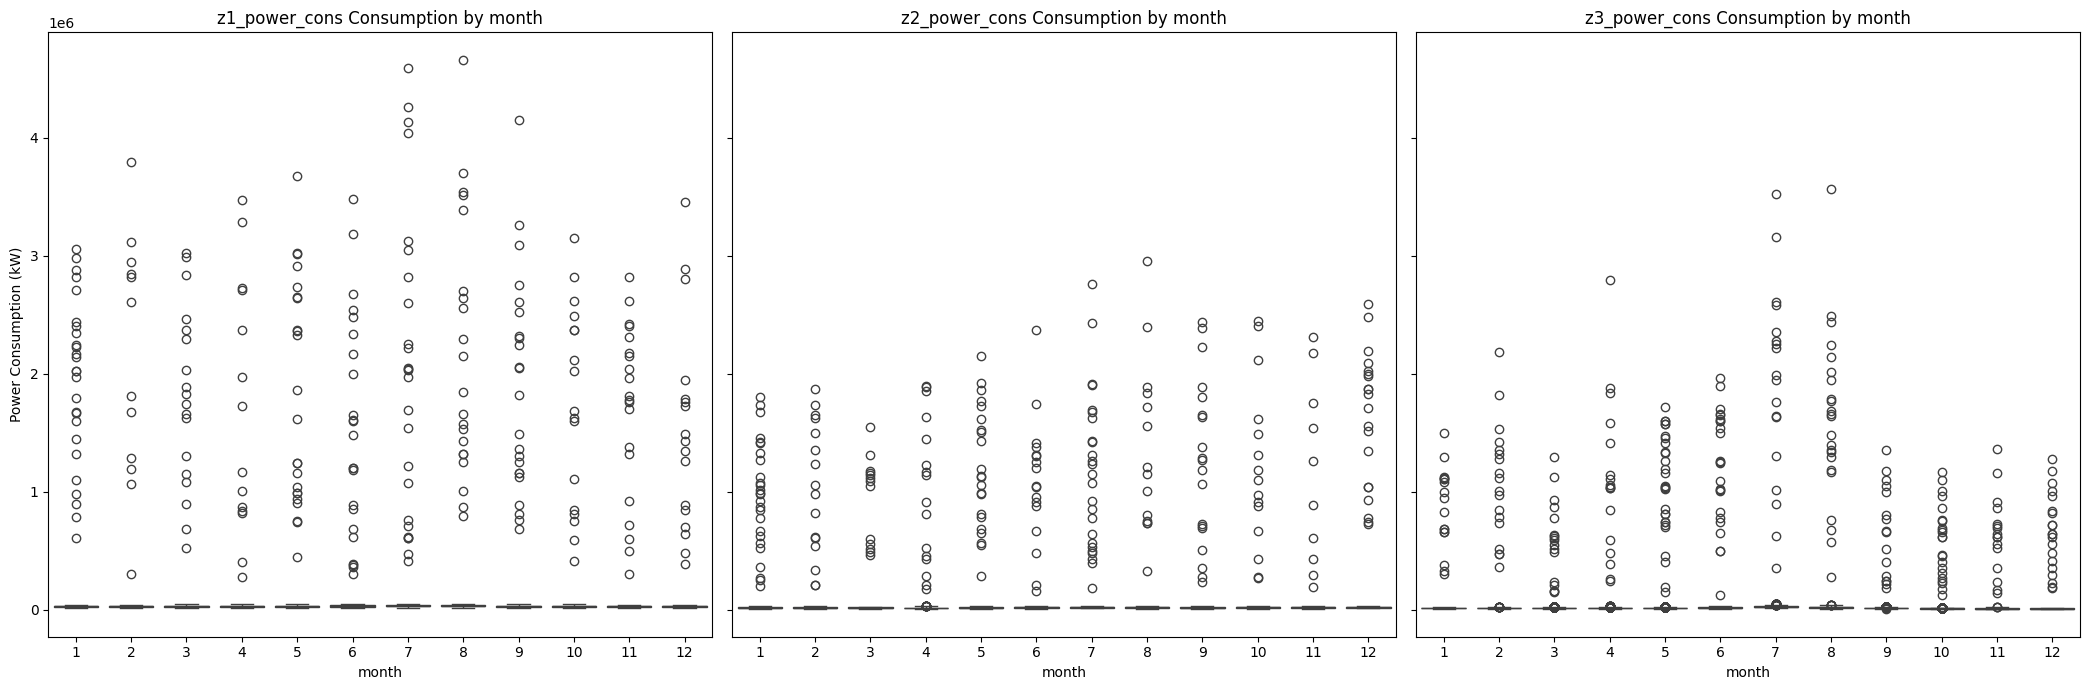

In [73]:
feature = 'month'

fig, axes = plt.subplots(1, 3, figsize=(21,7), sharey=True)

for i,zone in enumerate(['z1_power_cons','z2_power_cons','z3_power_cons']):
    sns.boxplot(x=feature, y=zone, data=df, ax=axes[i])
    axes[i].set_title(f'{zone} Consumption by {feature}')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Power Consumption (kW)')

plt.tight_layout()
plt.show()

It seems to be the case that Hour and Month could be important features

In [74]:
df.to_csv('./power_tetouan_city_after_EDA.csv')